# Michaelis-Menten

- X1+X2 -> X3 
- X3 -> X1+X2  
- X3 -> X2+X4

In [1]:
import pints
import pints.toy.stochastic
import matplotlib.pyplot as plt
import numpy as np
import math

In [22]:
import line_profiler

Specify initial concentration, time points at which to record concentration values, and rate constant value (k)

In [2]:
x_0 = [1e4, 2e3, 2e4, 0]
model = pints.toy.stochastic.MichaelisMentenModel(x_0)

times = np.linspace(0, 24, 100)
k = [1e-5, 0.2, 0.2]

values = model.simulate(k, times)

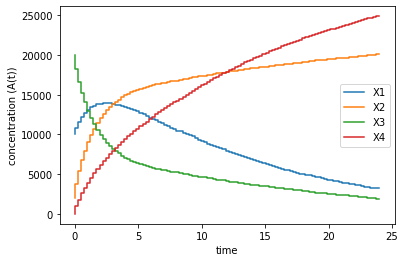

In [3]:
plt.step(times, values[:,0], label = 'X1')
plt.step(times, values[:,1], label = 'X2')
plt.step(times, values[:,2], label = 'X3')
plt.step(times, values[:,3], label = 'X4')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.show()

We can also evaluate this model using tau-leaping for more efficient but approximate simulations

In [24]:
values_exact = model.simulate(k, times)
values_approx = model.simulate(k, times, approx=True, approx_tau=0.0125)

In [39]:
def plot_output(vs, suffix=''):
    plt.step(times, vs[:,0], label = 'X1'+suffix)
    plt.step(times, vs[:,1], label = 'X2'+suffix)
    plt.step(times, vs[:,2], label = 'X3'+suffix)
    plt.step(times, vs[:,3], label = 'X4'+suffix)
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('Molecule Count')
    plt.show()

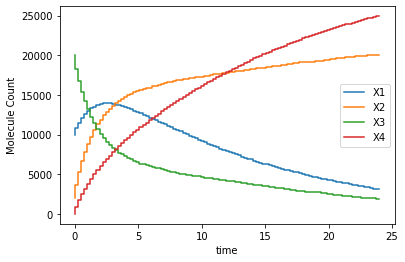

In [40]:
plot_output(values_exact)


In [33]:
def mc_estimate_approx(n,tau):
    return sum([model.simulate(k, times, approx=True, approx_tau=tau) for i in range(n)])/n

In [17]:
def mse(r1,r2):
    return np.square(r1 - r2).mean()

In [23]:
%timeit model.simulate(k, times)

2.17 s ± 167 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%timeit model.simulate(k, times, approx=True, approx_tau=0.0125)

43.9 ms ± 793 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
empirical_mean = sum([model.simulate(k, times) for i in range(30)])/30

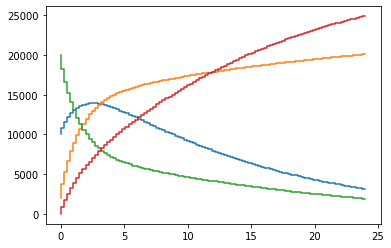

In [34]:
plot_output(empirical_mean)

In [37]:
exact_mse = 0
for i in range(25):
    exact = model.simulate(k, times)
    exact_mse += mse(exact, empirical_mean)/25

In [38]:
taus = [0.0125, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
approx_mses = []
for tau in taus:
    amse=0
    print("Running for tau = " + str(tau))
    for i in range(1000):
        sim = model.simulate(k, times, approx=True, approx_tau=tau)
        amse += mse(empirical_mean, sim)/1000
    approx_mses.append(amse)

Running for tau = 0.0125
Running for tau = 0.025
Running for tau = 0.05
Running for tau = 0.1
Running for tau = 0.25
Running for tau = 0.5
Running for tau = 1


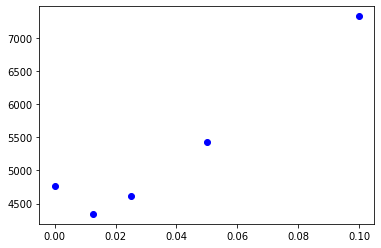

In [46]:
plt.plot([0]+taus[:4], [exact_mse]+approx_mses[:4], 'bo')